In [5]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from lafomo.datasets import DrosophilaSpatialTranscriptomics, ToySpatialTranscriptomics
from experiments.partial import build_partial, plot_partial
from pathlib import Path
from lafomo.plot import Colours, tight_kwargs

In [8]:
drosophila = False

if drosophila:
    data = 'dros-kr'
    dataset = DrosophilaSpatialTranscriptomics(gene='kr', data_dir='../data', scale=True)
    params = dict(lengthscale=10,
                  sensitivity=0.0970,
                  decay=0.0764,
                  diffusion=0.0015,
                  parameter_grad=False,
                  warm_epochs=-1,
                  natural=False,
                  clamp=True)
else:
    data = 'toy-spatial'
    dataset = ToySpatialTranscriptomics(data_dir='../data')
    params = dict(lengthscale=0.3,
                  sensitivity=1,
                  decay=0.1,
                  diffusion=0.01,
                  natural=False,
                  clamp=False)

filepath = lambda name: np.load(f'./{data}/partial/{name}.npy')
loss_with = filepath('trainloss_with')
loss_without = filepath('trainloss_without')
time_with = filepath('traintime_with')
time_without = filepath('traintime_without')

/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_asarray.py:102:

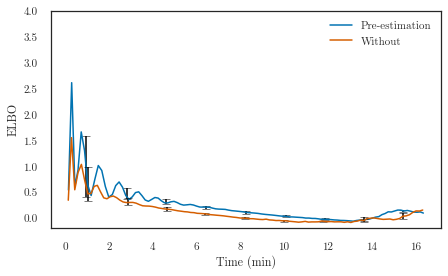

In [10]:
plt.figure(figsize=(7, 4))
def plot_errorbars(times, losses, nbins=10, start_index=0, color='black', label=''):
    times = times[:, start_index:]
    losses = losses[:, start_index:]
    bucket_ind = np.digitize(
        times, np.linspace(times.min(), times.max(), nbins))

    for i in range(10):
        time_bucket = times[bucket_ind == i]
        loss_bucket = losses[bucket_ind == i]
        plt.errorbar(time_bucket.mean(0), loss_bucket.mean(0), loss_bucket.std(0),
                     color='black', capsize=4, markeredgewidth=0.5)
    plt.plot(times.mean(0), losses.mean(0), color=color, label=label)

# these errorbars are incorrect. try for example with one sample.
plot_errorbars(time_with, loss_with, color=Colours.line_color, start_index=50, label='Pre-estimation')
plot_errorbars(time_without, loss_without, color=Colours.scatter_color, label='Without')
plt.ylim(-0.2, 4)
plt.xlabel('Time (min)')
plt.ylabel('ELBO')
plt.legend()
plt.savefig('preestimation_dros.pdf', **tight_kwargs)

t_sorted, dp [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ] 0.025
x dp is set to 0.025
t_sorted, dp [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ] 0.025


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


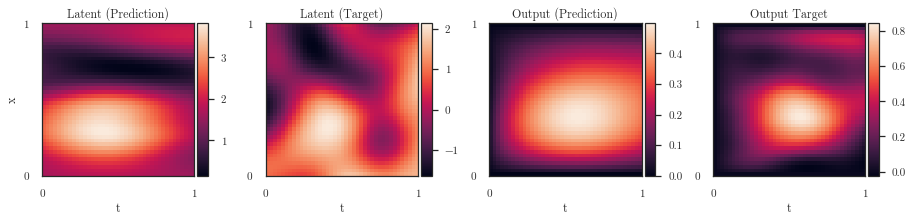

In [15]:
lfm, trainer, plotter = build_partial(
    dataset,
    params,
    reload=f'{data}/partial/model_with_0')
plot_partial(dataset, lfm, trainer, plotter, Path('./'), params)

t_sorted, dp [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ] 0.025
x dp is set to 0.025
t_sorted, dp [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ] 0.025


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


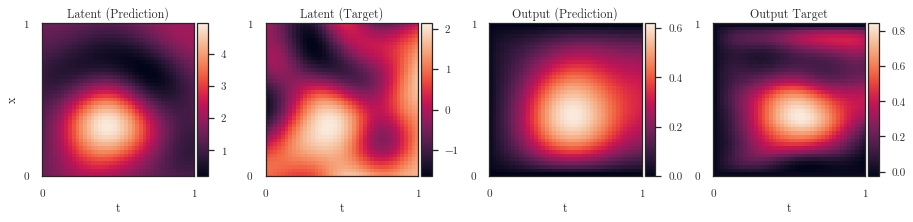

In [16]:
lfm, trainer, plotter = build_partial(
    dataset,
    params,
    reload=f'{data}/partial/model_without_0')
plot_partial(dataset, lfm, trainer, plotter, Path('./'), params)


In [13]:
trace_with = torch.load(f'{data}/partial/parameter_trace_with_0.pt')
trace_without = torch.load(f'{data}/partial/parameter_trace_without_0.pt')

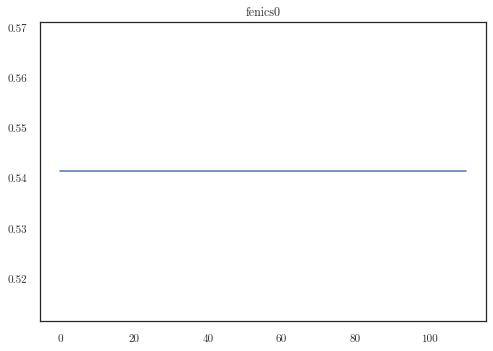

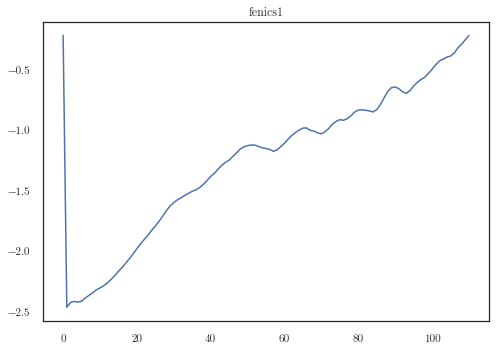

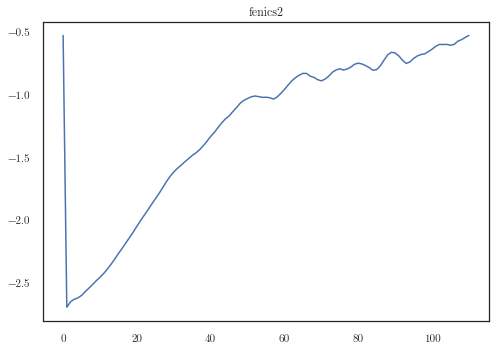

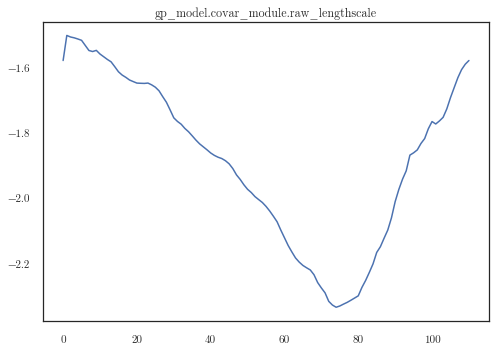

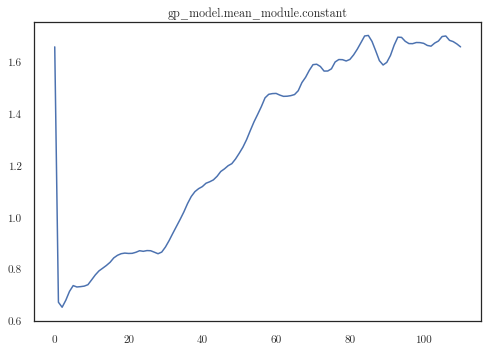

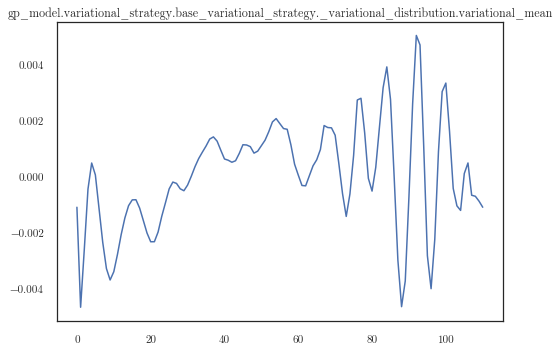

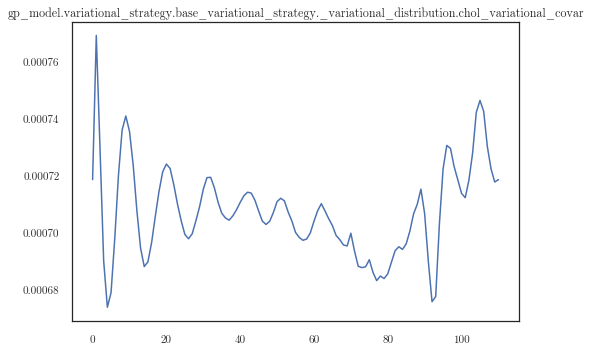

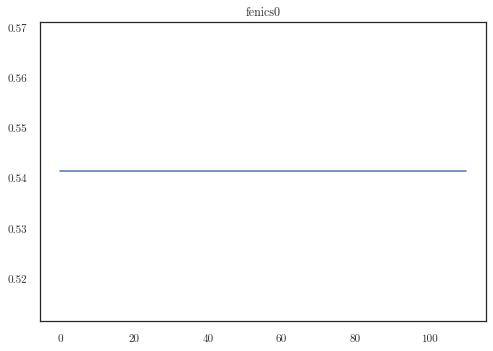

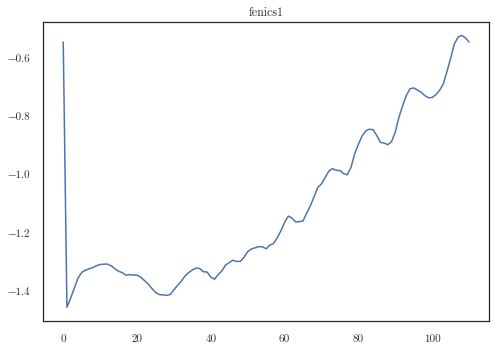

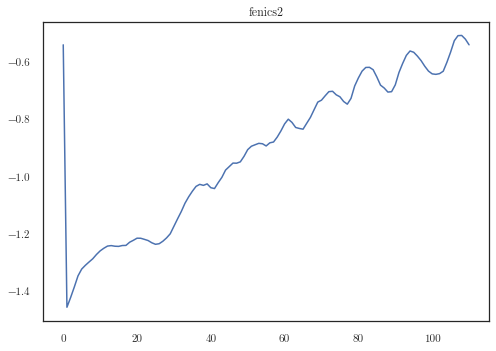

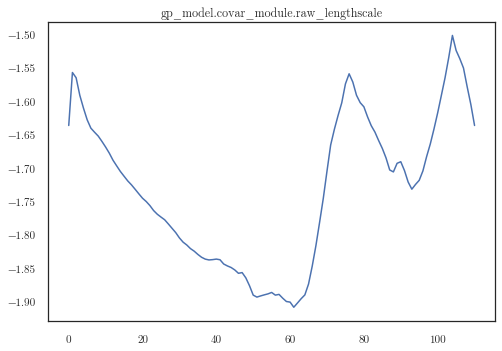

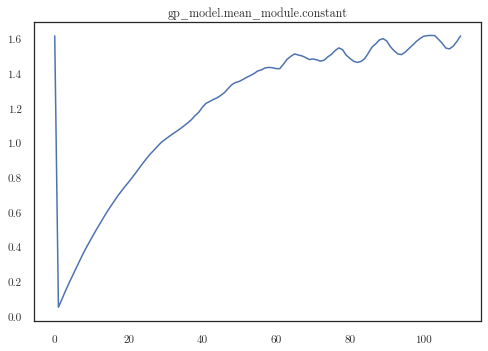

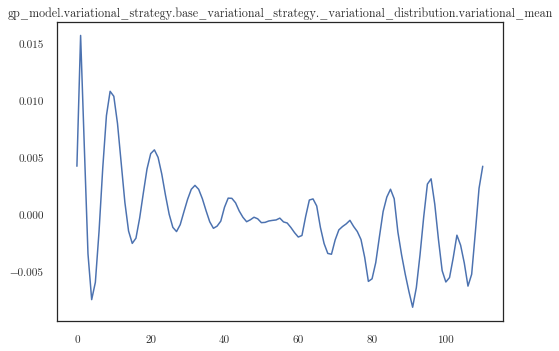

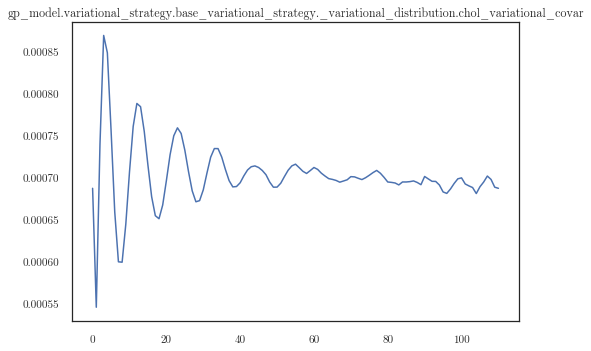

In [18]:
def get_mean_trace(trace):
    mean_trace = dict()
    for key in trace.keys():
        params = torch.stack(trace[key])
        for i in range(1, params.ndim):
            params = params.mean(-1)
        mean_trace[key] = params
    return mean_trace

def plot_trace(trace):
    trace = get_mean_trace(trace)
    for key in trace.keys():
        params = trace[key]
        plt.figure()
        plt.plot(params)
        plt.title(key)
plot_trace(trace_with)
plot_trace(trace_without)